Epoch 1/20


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 11668.1689 - val_loss: 9389.6406
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 9124.8223 - val_loss: 7730.3682
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 7352.7959 - val_loss: 6456.2246
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 6217.8809 - val_loss: 5495.9365
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5287.9204 - val_loss: 4784.0029
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4566.1753 - val_loss: 4270.6807
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4132.8809 - val_loss: 3918.5093
Epoch 8/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 3862.9780 - val_loss: 3687.5701
Epoch 9/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 3777.0469 - val_loss: 3544.1599
Epoch 10/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3561.9956 - val_loss: 3459.1211
Epoch 11/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 3439.0747 - val_l

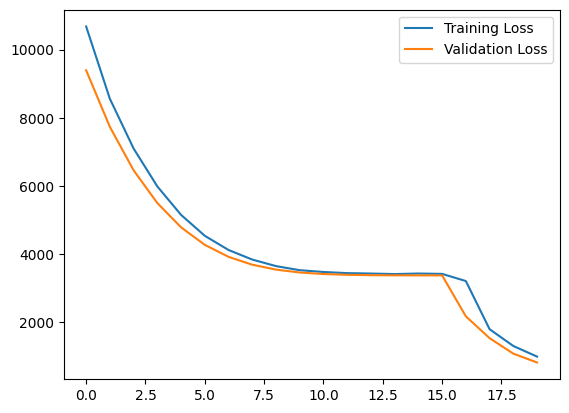

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


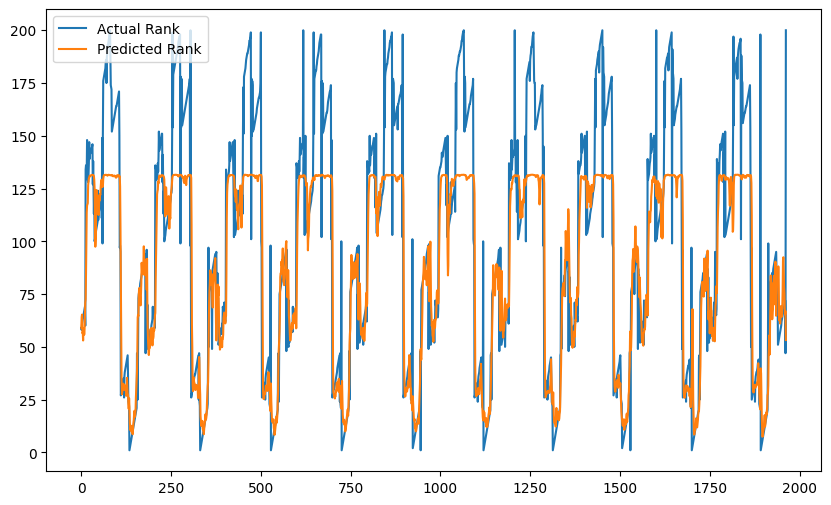

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'D:\MusicTrendAnalysis\data\daegeun_time_data.csv'
data = pd.read_csv(file_path)

# Drop the unnecessary 'Unnamed: 0' column and parse dates
data.drop(columns=['Unnamed: 0'], inplace=True)
data['date'] = pd.to_datetime(data['date'])

# Sort by date to maintain time order
data = data.sort_values('date')

# Use all columns except 'date' and 'Rank' as features
features = data.drop(columns=['date', 'Rank'])
labels = data['Rank']

# Scale the features to be between 0 and 1
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the data for LSTM
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Set time step
TIME_STEP = 30

# Create dataset with specified time steps
X, y = create_dataset(features_scaled, labels.values, TIME_STEP)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(TIME_STEP, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predicting on test data
predictions = model.predict(X_test)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Rank')
plt.plot(predictions, label='Predicted Rank')
plt.legend()
plt.show()

Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - loss: 11448.9492 - val_loss: 9559.5352
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 9136.7559 - val_loss: 7922.8560
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 7414.5776 - val_loss: 6648.5381
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 6453.7529 - val_loss: 5670.8271
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 5426.6450 - val_loss: 4932.4146
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - loss: 4872.0352 - val_loss: 4394.2344
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - loss: 4291.0566 - val_loss: 4013.8308
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 3940.9133 - val_loss: 3756.7673
Epoch 9/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 3779.3086 - val_loss: 3593.9958
Epoch 10/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 3581.2104 - val_loss: 3493.1704
Epoch 11/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - l

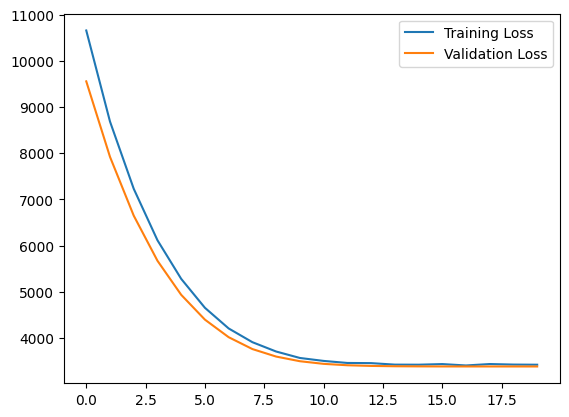

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


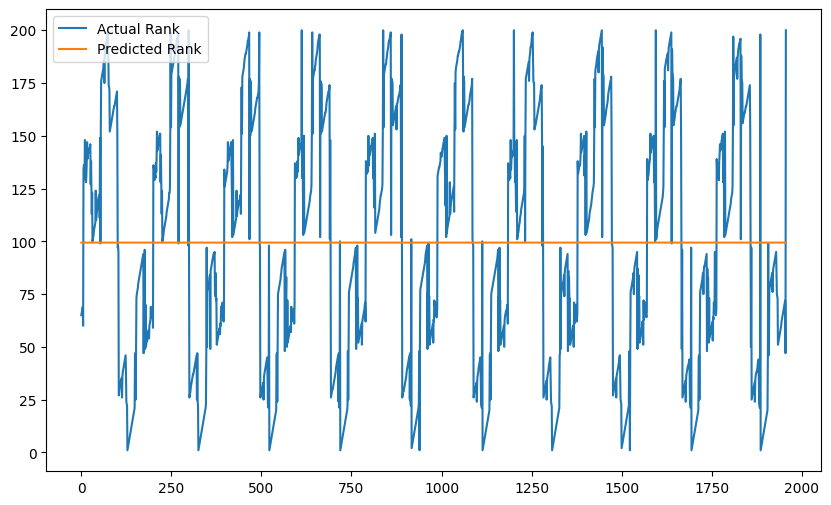

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'D:\MusicTrendAnalysis\data\daegeun_time_data.csv'
data = pd.read_csv(file_path)

# Drop the unnecessary 'Unnamed: 0' column and parse dates
data.drop(columns=['Unnamed: 0'], inplace=True)
data['date'] = pd.to_datetime(data['date'])

# Sort by date to maintain time order
data = data.sort_values('date')

# Use all columns except 'date' and 'Rank' as features
features = data.drop(columns=['date', 'Rank'])
labels = data['Rank']

# Scale the features to be between 0 and 1
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the data for LSTM
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Set time step
TIME_STEP = 60  # Increased time step to 60

# Create dataset with specified time steps
X, y = create_dataset(features_scaled, labels.values, TIME_STEP)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(TIME_STEP, X.shape[2])))
model.add(LSTM(100, return_sequences=True))  # Increased LSTM units to 100
model.add(Dropout(0.3))  # Increased dropout rate
model.add(LSTM(100, return_sequences=True))  # Added an additional LSTM layer
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predicting on test data
predictions = model.predict(X_test)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Rank')
plt.plot(predictions, label='Predicted Rank')
plt.legend()
plt.show()

Epoch 1/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - loss: 11612.6543 - mae: 91.2574 - val_loss: 10326.4961 - val_mae: 84.6657
Epoch 2/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - loss: 9977.6729 - mae: 83.0369 - val_loss: 9097.9629 - val_mae: 78.5091
Epoch 3/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - loss: 8720.9873 - mae: 76.6494 - val_loss: 8051.9546 - val_mae: 73.2815
Epoch 4/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - loss: 7794.3369 - mae: 72.0570 - val_loss: 7167.7617 - val_mae: 68.8891
Epoch 5/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - loss: 7074.3389 - mae: 68.6989 - val_loss: 6413.9941 - val_mae: 65.1541
Epoch 6/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - loss: 6247.0522 - mae: 64.5145 - val_loss: 5778.8271 - val_mae: 62.0112
Epoch 7/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - loss: 5690.4878 - mae: 61.5642 - val_loss: 5248.9819 - val_mae: 59.3983
Epoch 8/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - loss: 5067.9727 - mae: 58.5904 - val_l

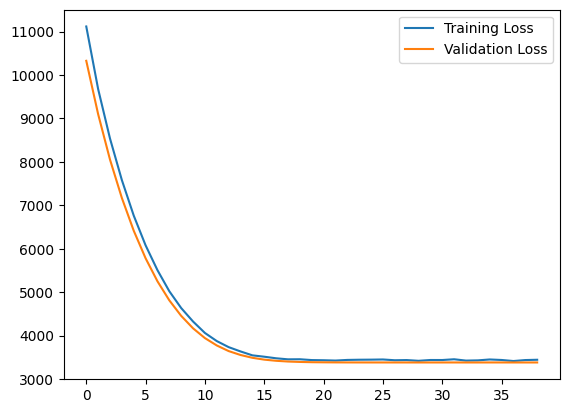

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


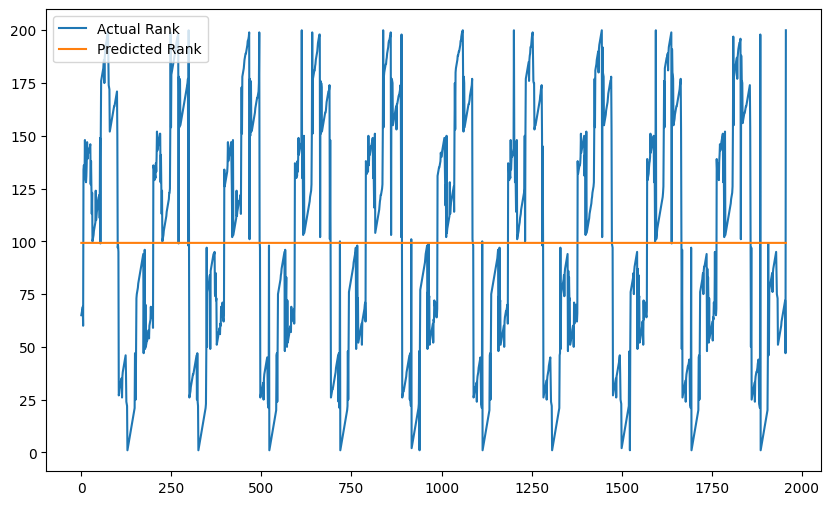

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 데이터셋 로드
file_path = r'D:\MusicTrendAnalysis\data\daegeun_time_data.csv'
data = pd.read_csv(file_path)

# 불필요한 'Unnamed: 0' 열 제거 및 날짜 파싱
data.drop(columns=['Unnamed: 0'], inplace=True)
data['date'] = pd.to_datetime(data['date'])

# 시간 순서를 유지하기 위해 날짜 기준 정렬
data = data.sort_values('date')

# 'date'와 'Rank'를 제외한 모든 열을 특성으로 사용
features = data.drop(columns=['date', 'Rank'])
labels = data['Rank']

# 특성을 0과 1 사이로 스케일링
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# LSTM을 위한 데이터 준비
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# 타임 스텝 설정
TIME_STEP = 60  # 타임 스텝을 60으로 증가

# 지정된 타임 스텝으로 데이터셋 생성
X, y = create_dataset(features_scaled, labels.values, TIME_STEP)

# 데이터를 학습 및 테스트 세트로 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 구축
model = Sequential()
model.add(Input(shape=(TIME_STEP, X.shape[2])))
model.add(LSTM(128, return_sequences=True))  # LSTM 유닛 수를 128로 증가
model.add(Dropout(0.4))  # 드롭아웃 비율 증가
model.add(LSTM(128, return_sequences=True))  # 추가 LSTM 레이어 추가
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=False))  # LSTM 유닛 수 증가
model.add(Dropout(0.3))
model.add(Dense(1))

# 하이퍼파라미터 튜닝: 낮은 학습률로 모델 컴파일
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # 학습률을 0.0005로 설정
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# 조기 종료와 모델 체크포인트 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # 조기 종료 기준 변경
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=200,  # 에폭 수를 200으로 증가
    batch_size=32,  # 배치 크기를 32로 변경
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)

# 학습 기록 그래프 출력
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 테스트 데이터 예측
predictions = model.predict(X_test)

# 실제 값과 예측 값 비교 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Rank')
plt.plot(predictions, label='Predicted Rank')
plt.legend()
plt.show()